In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

Degree Centrality
Identifies the most importante nodes in a network

Directed network: degree
Undirected network: in-degree and/or out-degree
Directed Network:

Centrailty(node) = degree(v) / (|all nodes| - 1)

0 <= Centrality <= 1

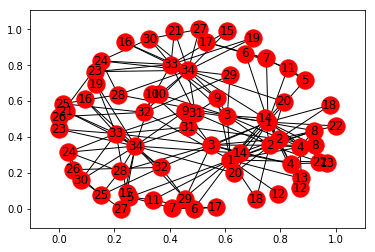

In [3]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)
pos = nx.draw_networkx(g)
nx.draw_networkx(g, pos)

In [4]:
nx.center(g)

[1, 2, 3, 4, 9, 14, 20, 32]

In [5]:
nx.degree_centrality(g)[34] # 13/33

0.5151515151515151

In [6]:
nx.degree_centrality(g)[33] # 12/33

0.36363636363636365

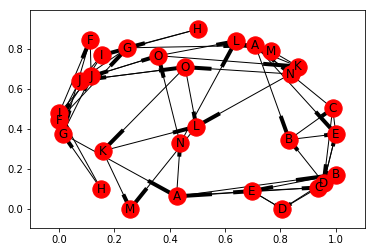

In [8]:
# example 2
gd = nx.MultiDiGraph()
e = [
        ('A', 'B'), ('A', 'E'), ('A', 'N'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'), ('C', 'D'),
        ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'),
        ('F', 'G'),
        ('G', 'A'), ('G', 'J'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'),
        ('L', 'M'),
        ('N', 'L'), ('N', 'O'),
        ('O', 'K'), ('O', 'L'),('O','J')
    ]
gd.add_edges_from(e)
gd

pos = nx.draw_networkx(gd)
nx.draw_networkx(gd, pos)

In [10]:
# IN-degree
i = nx.in_degree_centrality(gd)
# OUT-degree
o = nx.out_degree_centrality(gd)

In [11]:
i['A'], o['A']

(0.14285714285714285, 0.21428571428571427)

Closenesse Centrality
Nodes that are important, will be close to other nodes
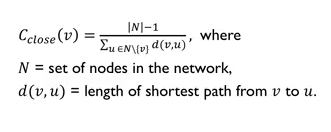

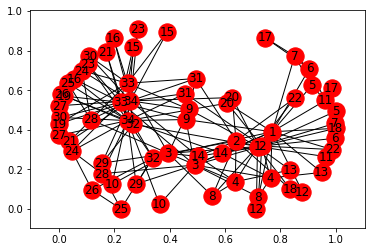

In [13]:
#example 3
pos = nx.draw_networkx(g)
nx.draw_networkx(g, pos)

In [14]:
cc = nx.closeness_centrality(g)

In [15]:
cc[32]

0.5409836065573771

In [16]:
sum(nx.shortest_path_length(g, 32).values())

61

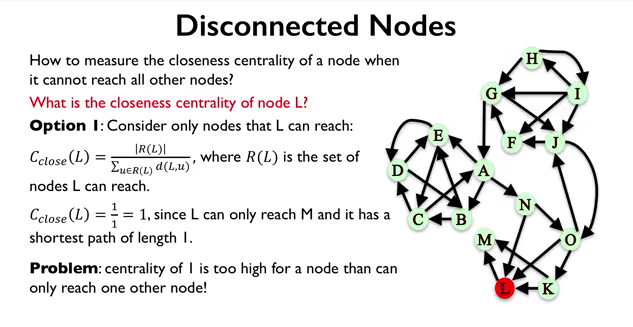

In [17]:
nx.closeness_centrality(gd)

{'A': 0.354679802955665,
 'B': 0.22857142857142856,
 'C': 0.277992277992278,
 'D': 0.19047619047619047,
 'E': 0.22857142857142856,
 'F': 0.2706766917293233,
 'G': 0.36734693877551017,
 'H': 0.34146341463414637,
 'I': 0.3550420168067227,
 'J': 0.2857142857142857,
 'K': 0.14285714285714285,
 'L': 0.07142857142857142,
 'M': 0.0,
 'N': 0.22360248447204967,
 'O': 0.2508710801393728}

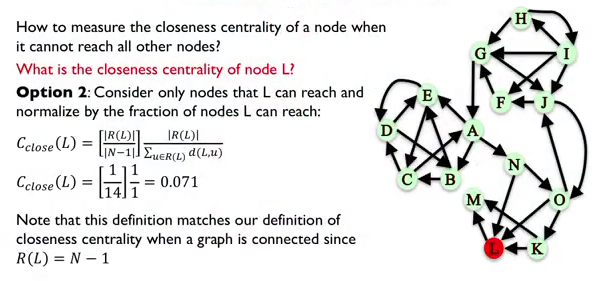

In [18]:
nx.closeness_centrality(gd)['L']

0.07142857142857142

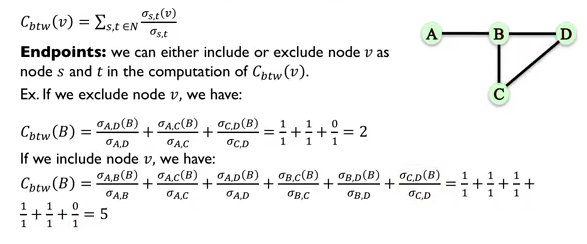

In [19]:
g_noD = nx.DiGraph()
g_noD.add_edges_from([
    
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('D', 'B'),
    ('D', 'C')
    
])

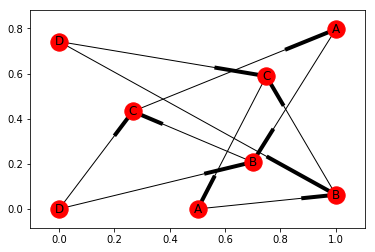

In [21]:
pos = nx.draw_networkx(g_noD)
nx.draw_networkx(g_noD, pos)

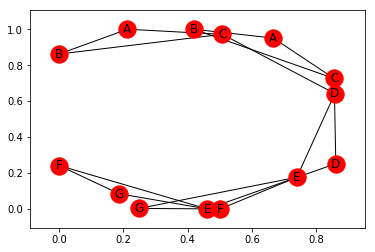

In [23]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'C'),
        ('B', 'C'),
        ('C', 'D'),
        ('D', 'E'),
        ('E', 'F'), ('E', 'G'),
        ('F', 'G')
    ]
)
pos = nx.draw_networkx(g)
nx.draw_networkx(g, pos)

In [24]:
bcc = nx.betweenness_centrality(G=g, endpoints=False)
bcc

{'A': 0.0,
 'B': 0.0,
 'C': 0.5333333333333333,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

In [25]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

In [26]:
maxKeyVal(bcc), minKeyVal(bcc)

(('D', 0.6), ('A', 0.0))

Normalization: BetCentrality values will be larger in graphs with many nodes.

Undirected Graphs:

1/2 * ((|N| - 1) * (|N| - 2))

Directed Graphs

(|N| - 1) * (|N| - 2)

nx.betweenness_centrality() method already has a 'normalized' parameter, True as default

# Example 7
Betweeness Centrality can be cost intensive

O(|N|³)

which leads us to calculate it using samples from the graph

In [27]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)
betCentrality = nx.betweenness_centrality(G=g, normalized=True, endpoints=False)
# Using (k = 10) samples
betCentrality_approx = nx.betweenness_centrality(G=g, normalized=True, endpoints=False, k=10)
from operator import itemgetter
# top 5 from bet
sorted(betCentrality.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327),
 (9, 0.05592682780182782)]

In [28]:
# top 5 from betCentrality_approx
sorted(betCentrality_approx.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.4759555375180375),
 (34, 0.3639560786435787),
 (33, 0.2036228354978355),
 (32, 0.1659140512265512),
 (3, 0.08483134920634922),
 (6, 0.06385732323232322)]

In [30]:
# Example 8
#Compute the BetCentrality between two groups, source and target groups

s_nodes = [34, 33, 21, 30, 16, 27, 15, 23, 10]
t_nodes = [1, 4, 13, 11, 6, 12, 17, 7]
betCen_subset = nx.betweenness_centrality_subset(G=g,
                                                sources=s_nodes,
                                                targets=t_nodes,
                                                normalized=True)
# top 5 from betCen_subset
sorted(betCen_subset.items(), key=itemgetter(1), reverse=True)[:6]

In [32]:
# Example 9
#Use BetCentrality to find imoprtant edges

betCen_edges = nx.edge_betweenness_centrality(G=g, normalized=True)
# top 5 from betCen_edges
sorted(betCen_edges.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 32), 0.12725999490705373),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.07778768072885717),
 ((1, 9), 0.07423959482783016),
 ((3, 33), 0.06898678663384546)]

In [33]:
#Compute the BetCentrality between two edges groups, source and target groups

betCen_edges_subset = nx.edge_betweenness_centrality_subset(G=g,
                                                            sources=s_nodes,
                                                            targets=t_nodes,
                                                            normalized=True)

In [34]:
# top 5 from betCen_edges_subset
sorted(betCen_edges_subset.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 9), 0.01366536513595337),
 ((1, 32), 0.01366536513595337),
 ((14, 34), 0.012207509266332794),
 ((1, 3), 0.01211343123107829),
 ((1, 6), 0.012032085561497326),
 ((1, 7), 0.012032085561497326)]

In [35]:
# shoud have done it before...

from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

Page Rank
(Best applied for Directed Networks)
Suppose we have a network with n nodes

Each node will have a rank of 1/n. That implies that the sum() of all ranks is always equal to 1

Then, perform the PageRank Update Rule k times

PageRank Update Rule:

Each node gives an equal share of its current PageRank to all the nodes to
whom it is linked
# Example 10
Performing PageRake Update Rule for k = 2
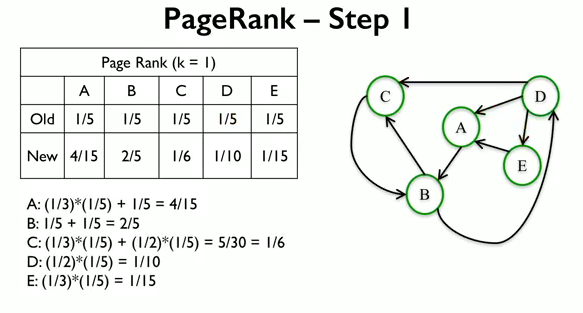
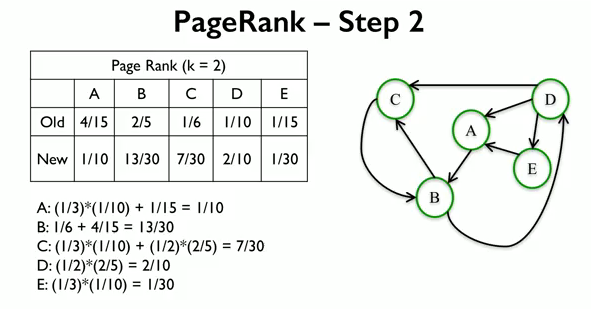
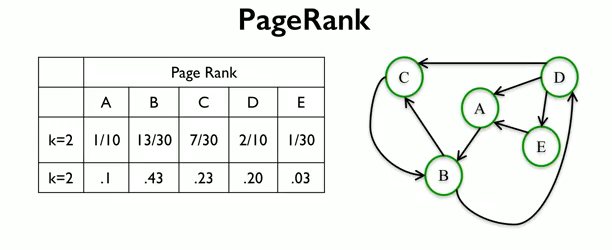
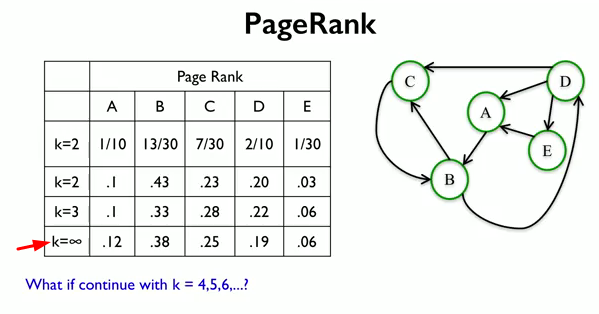
## Scaled Page Rank
Random Walk of k steps:

Start on a random node, then choose an outgoing edge at random an follow it to the next node; repeat k times.

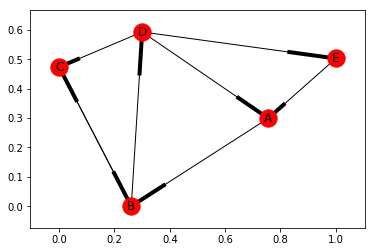

In [36]:
# The graph from the picture above
g = nx.DiGraph()
g.add_edges_from([
    ('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), 
    ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A'), 
])
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

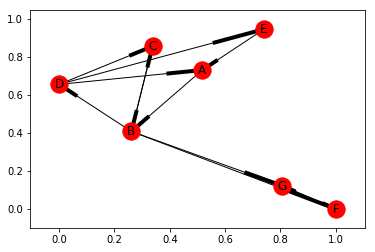

In [37]:
# We can interpreter a PageRank value as the probability of landing on a node (page) after k steps. Hence, the probability of landing on node 'B' at the end of a random walk is higher

# Example 11
g_new = g.copy()
# g with new nodes 'F', 'G', and new edges
g_new.add_edges_from([('B', 'F'), ('B', 'G'), ('F', 'G'), ('G', 'F')])
pos = nx.spring_layout(g_new)
nx.draw_networkx(g_new, pos)

Random walks will probably land on nodes 'F' or 'G', since either of them is only connected to each other

We add a damping parameter alfa. Changing the behaviour of our Random Walk:

Start a node 'v', then:
With probabilty alfa: choose an outgoing edge and follow it to the next node;
With probabilty 1 - alfa: choose a random node and jump directly to it;
Repeat ktimes
Now we have a way out to not be locked on nodes 'F' or 'G'

In [38]:
# Simple PageRank
pr_g = nx.pagerank(g)
# PageRank for g_new
# nx.pagerank() already has a standard alpha parameter of 0.85
pr_gnew = nx.pagerank(g_new)
# but we can change it
pr_gnew_a = nx.pagerank(G=g_new, alpha=0.9)
orderDict(pr_g)

[('B', 0.35519316255962574),
 ('C', 0.23222770978534224),
 ('D', 0.18095642215666963),
 ('A', 0.15035141786968964),
 ('E', 0.08127128762867263)]

In [39]:
orderDict(pr_gnew)

[('G', 0.3280507927524911),
 ('F', 0.328050792752491),
 ('B', 0.13072972919003595),
 ('A', 0.06543693487722958),
 ('C', 0.06315158949959035),
 ('D', 0.04920893254397847),
 ('E', 0.03537122838418331)]

In [40]:
orderDict(pr_gnew_a)

[('F', 0.37011515621714647),
 ('G', 0.3701151562171464),
 ('B', 0.10100891814607932),
 ('A', 0.04824078073043102),
 ('C', 0.04811713720174119),
 ('D', 0.03701306787128782),
 ('E', 0.02538978361616765)]

# Hubs and Authorities
Root: Set of highly relevant web pages. Potential authorities;

Base: Root nodes and any node that links to a node in root;

Hubs: Nodes that are not our target, but link to those who are;

Authorities: Interest node(s)

"Hubs estimates the node value based on outgoing links

Authorities estimates the node value based on the incoming links"

Consider all the edges connecting nodes in the base set
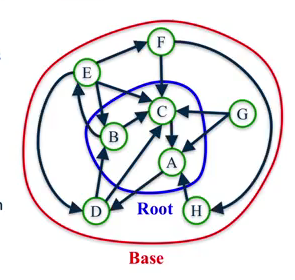
Instead of calculating the PageRank for all nodes in the network, we begin with a subset of the network, trying to work with possible strong candidates

# Example 12
HITS Algorithm:

Assign each node an Authtority & Hub Score of 1;

Apply the Authority Update Rule:

Each node's authority score is the sum of hub scoresof each node that points to it
Apply the Hub Update Rule:

Each node's hub score is the sum of authority scores of each node that it points to
Normalize Authority and Hub scores:

auth(j) = auth(j) / sum(auth(i))
hub(j) = hub(j) / sum(hub(i))
Repeat k times

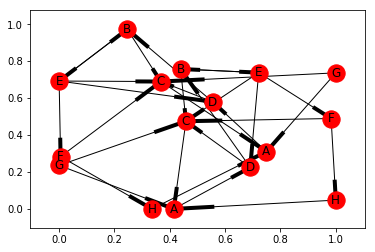

In [42]:
g = nx.DiGraph()
g.add_edges_from(
    [
        ('A', 'D'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'),
        ('D', 'B'), ('D', 'C'),
        ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'F'),
        ('F', 'C'), ('F', 'H'),
        ('G', 'C'), ('G', 'A'),
        ('H', 'A')
    ]
)
pos = nx.draw_networkx(g)
nx.draw_networkx(g, pos)

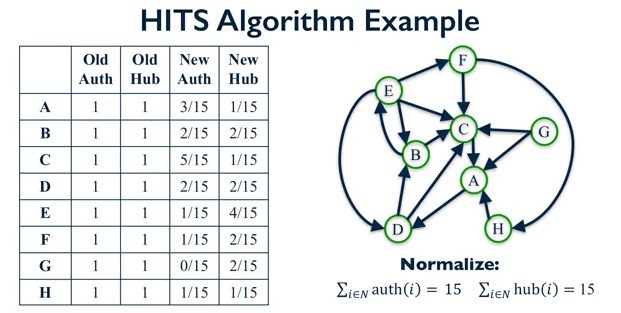
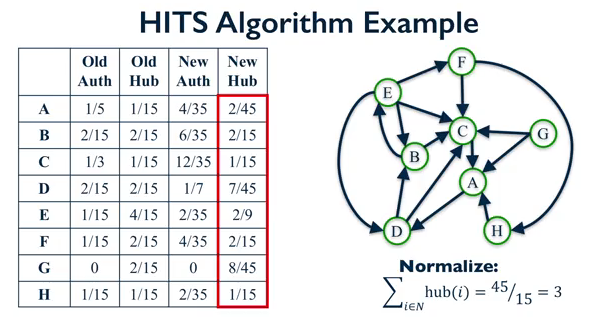
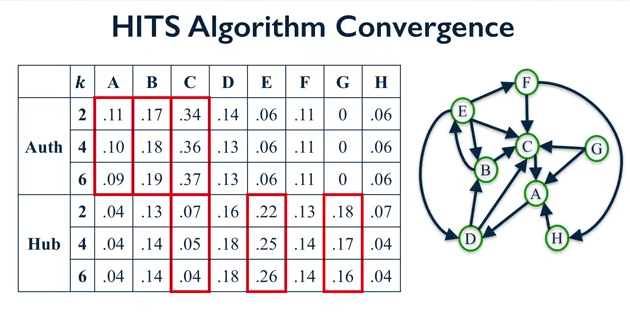
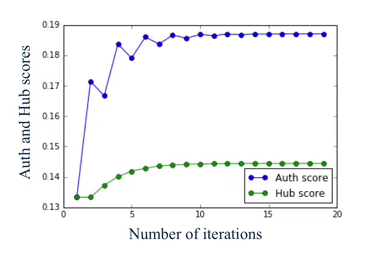
For most networks, as k grows, the authority and hub scores do converge to a unique value
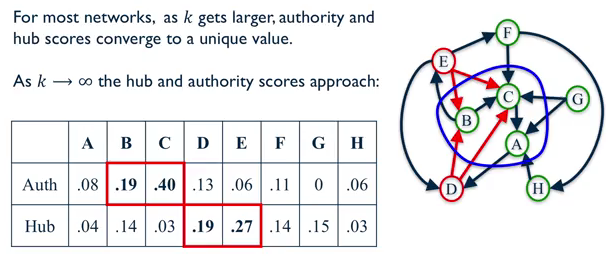

In [43]:
hub, autr = nx.hits(g)
orderDict(autr)[:3]

[('C', 0.36903609552875044),
 ('B', 0.18704574147053715),
 ('D', 0.1276828398619346)]

In [44]:
orderDict(hub)[:3]

[('E', 0.26762580012702586),
 ('D', 0.18749100142258587),
 ('G', 0.15393432501469498)]

Nodes that have:

incoming edges from good hubs are good authorities
outgoing edges to good authorities are good hubs
## Comparing Centrality Measures

In [45]:
g = nx.MultiDiGraph()
g.add_edges_from([
        ('1', '2'), ('1', '5'),
        ('2', '1'), ('2', '3'), ('2', '4'), 
        ('3', '1'), ('3', '2'), ('3', '4'), 
        ('4', '1'), ('4', '3'), 
        ('5', '1'), ('5', '6'), 
        ('6', '7'), ('6', '5'), 
        ('7', '6'), ('7', '8'), ('7', '9'), 
        ('8', '6'), ('8', '7'), ('8', '9'), 
        ('9', '6'), ('9', '8'), 
    ])

g

In [46]:
indg = orderDict(nx.in_degree_centrality(g))
ccen = orderDict(nx.closeness_centrality(g))
betcen = orderDict(nx.betweenness_centrality(g))
g_single = nx.Graph(g.to_undirected())
pgrk = orderDict(nx.pagerank(g_single))
hubs, autr = nx.hits(g_single)

hubs = orderDict(hubs)
autr = orderDict(autr)
import pandas as pd
col_names = ['in-degree', 'closeness', 'betweness', 'page rank', 'autr', 'hubs']
df = pd.DataFrame(columns=col_names)
df['in-degree'] = [n for n, v in indg]
df['closeness'] = [n for n, v in ccen]
df['betweness'] = [n for n, v in betcen]
df['page rank'] = [n for n, v in pgrk]
df['autr'] = [n for n, v in autr]
df['hubs'] = [n for n, v in hubs]
df

,in-degree,closeness,betweness,page rank,autr,hubs
0,1,5,5,1,1,1
1,6,1,1,6,6,6
2,2,6,6,4,2,2
3,5,2,2,9,3,3
4,3,3,7,2,4,4
5,4,7,3,3,7,7
6,7,8,8,7,8,8
7,8,4,4,8,9,9
8,9,9,9,5,5,5


# quiz

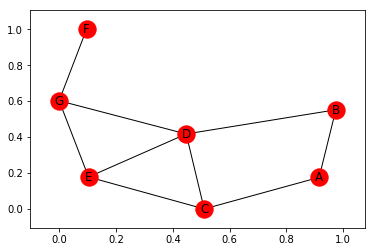

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'D'), ('C', 'A'), 
        ('C', 'D'), ('C', 'E'), ('D', 'E'), 
        ('E', 'G'), ('G', 'D'), ('G', 'F')
    ]
)
nx.draw_networkx(g)

In [52]:
q1 = nx.degree_centrality(g)['D']
q1

0.6666666666666666

In [53]:
q2 = nx.closeness_centrality(g)['G']
q2

0.6

In [54]:
q3 = nx.betweenness_centrality(g, endpoints=False)['G']
q3

0.3333333333333333

In [55]:
q4 = nx.edge_betweenness_centrality(g, normalized=False)
q4['G', 'F']

6.0

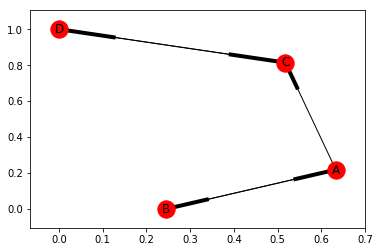

In [56]:
#example 7
g = nx.DiGraph()
g.add_edges_from([('B', 'A'), ('A', 'C'), ('C', 'D'), ('D', 'C'), ('A', 'B')])

nx.draw_networkx(g)

In [57]:
a_d = {}
for damp in [0.5, 0.8, 0.9, 0.95]:
    a_d[str(damp)] = nx.pagerank(G=g, alpha=damp)['D']

q7 = orderDict(a_d)[0][0]
q7

'0.95'

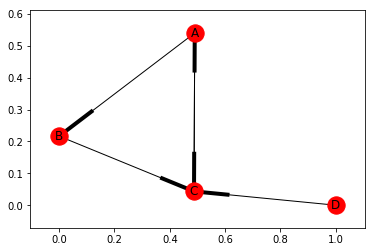

In [58]:
g = nx.DiGraph()
g.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('D', 'C')])

nx.draw_networkx(g)

We have to calculate it by hand

Each node starts with a PageRank of 1/numOfNodes, what gives as 1/4

Then, apply the algorithm

Node A has 2 out-edges

Node B has 1 out-edge

Node D as 1 out-edges

In [59]:
basePr = 1/4
a = 1/2
b = 1
d = 1
pr_C = basePr*a + basePr*b + basePr*d
pr_C

0.625

In [61]:
# example 9
hubs, autr = nx.hits(g)
autr['C'], hubs['C']
# No math here, just a hunch looking at the final values...
q9 = (0.57, 0.09)
q9

(0.57, 0.09)